In [11]:
# https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras import utils

In [12]:
data_dir = "../Datasets/SRSI RSI CB256/data/" # image folder

In [13]:
# get the list of pics from sub image class folders
def img_dict(root_dir):
    target_classes = {}
    for folder in sorted(os.listdir(root_dir)):
        data_path_for_image_folder = root_dir+ '/'+str(folder) + '/'
        target_classes[str(folder)] = [image_filename for image_filename in sorted(os.listdir(data_path_for_image_folder))]
    return target_classes

In [14]:
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = utils.load_img(fp, target_size = size, 
                                       color_mode = 'rgb')
        # covert image to a matrix
        img_ts = utils.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

In [15]:
# convert images into numpy matrices
classes_dict = img_dict(data_dir)
img_mat_dict = {}
for key in classes_dict:
    img_mat_dict[key] = img2np(data_dir+key+"/", classes_dict[key])

In [16]:
def find_mean_img(full_mat, size = (64, 64, 3)):
    # calculate the average
    mean = np.mean(full_mat, axis = 0)

    # reshape it back to a matrix
    mean_img = mean.reshape(size)
    mean_img = mean_img/255 #normalize for color range

    return mean_img

In [17]:
def find_var_img(full_mat, size = (64, 64, 3)):
    # calculate the variance
    var =  np.var(full_mat, axis = 0)

    # reshape it back to a matrix
    var_img = var.reshape(size)
    max_var = np.max(var_img)
    var_img = var_img/max_var #normalize for color range

    return var_img

In [18]:
def plot_mean_var_img(mean_img_dict, var_img_dict):
    fig, axs = plt.subplots(len(mean_img_dict), 2, figsize=(10,20))
    idx = 0
    for key in mean_img_dict:
        #average
        axs[idx,0].imshow(mean_img_dict[key])
        axs[idx,0].set_title(f'Average Image of {key}')

        #variance
        axs[idx,1].imshow(var_img_dict[key])
        axs[idx,1].set_title(f'Variance Image of {key}')
        idx = idx+1


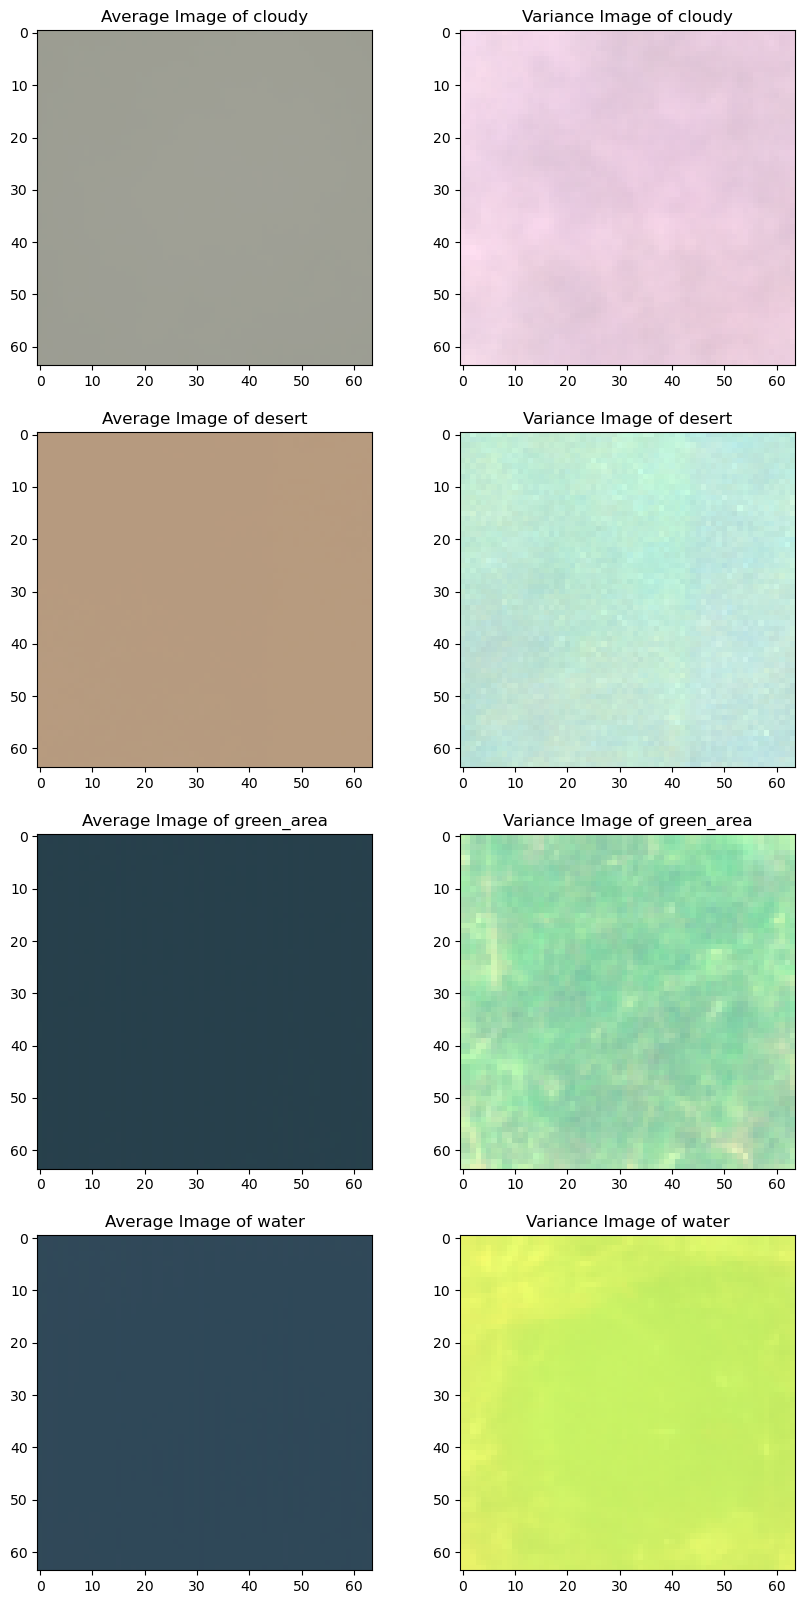

In [19]:
# find mean image of each class
mean_img_dict = {}
var_img_dict = {}

for key in img_mat_dict:
    mean_img_dict[key] = find_mean_img(img_mat_dict[key])
    var_img_dict[key] = find_var_img(img_mat_dict[key])

plot_mean_var_img(mean_img_dict, var_img_dict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of PC:  1


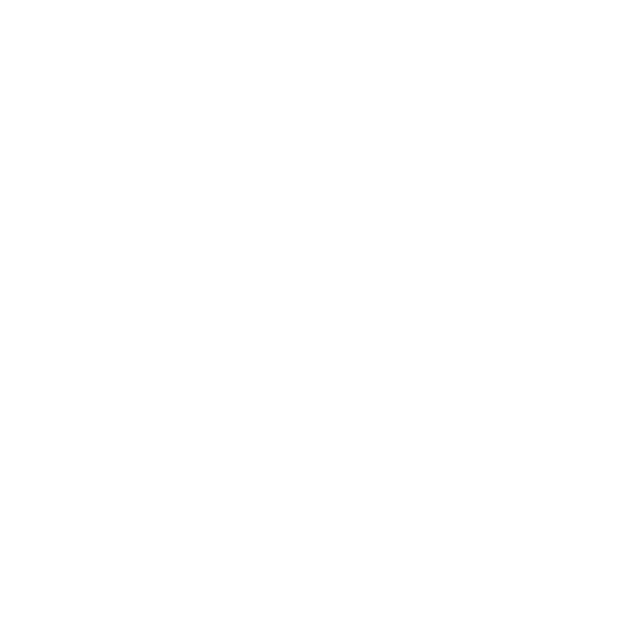

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of PC:  2


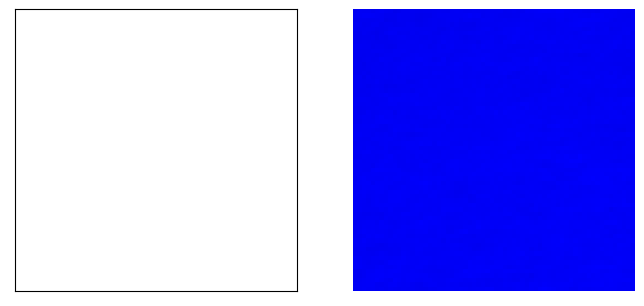

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of PC:  2


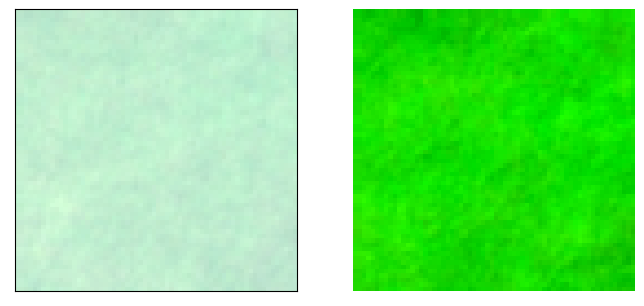

Number of PC:  1


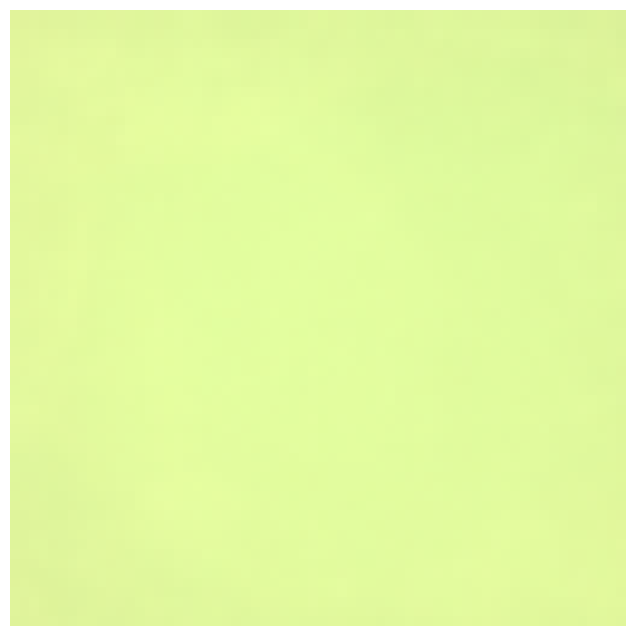

In [20]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64, 3)):
    # plot eigenimages in a grid
    n = pca.n_components_

    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        norml = pca.components_[i]/max(pca.components_[i])
        ax.imshow(norml.reshape(size))
    plt.axis('off')
    plt.show()

plot_pca(eigenimages(img_mat_dict["cloudy"], "cloudy"))
plot_pca(eigenimages(img_mat_dict["desert"], "desert"))
plot_pca(eigenimages(img_mat_dict["green_area"], "green_area"))
plot_pca(eigenimages(img_mat_dict["water"], "water"))